In [64]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

tf.__version__

'2.4.1'

In [65]:
keras.__version__

'2.4.0'

In [66]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [67]:
X_train_full.shape

(60000, 28, 28)

In [68]:
X_train_full.dtype

dtype('uint8')

In [69]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [70]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [71]:
class_names[y_train[0]]  # First item represents a coat

'Coat'

In [72]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

# or

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_24 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.layers

In [75]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [76]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0187 - accuracy: 0.6805 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5027 - accuracy: 0.8262 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4483 - accuracy: 0.8428 - val_loss: 0.5304 - val_accuracy: 0.7996
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4209 - accuracy: 0.8532 - val_loss: 0.3916 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4060 - accuracy: 0.8586 - val_loss: 0.3743 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8674 - val_loss: 0.3711 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3651 - accuracy: 0.8711 - val_loss: 0.3619 - val_accuracy:

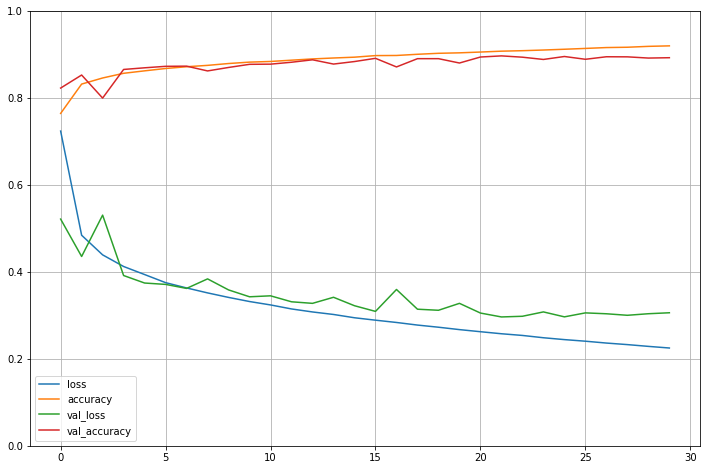

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set vertical range to [0-1]
plt.show()

In [78]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3388 - accuracy: 0.8813


[0.338808536529541, 0.8812999725341797]

In [79]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [80]:
y_pred = model.predict_classes(X_new)
y_pred

/home/asgrim/.pyenv/versions/miniconda3-latest/envs/book-learning/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [81]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [82]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_test.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2270 - val_loss: 0.6806
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6066 - val_loss: 0.5710
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6332 - val_loss: 0.4964
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4747 - val_loss: 0.4785
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4391 - val_loss: 0.4615
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4368 - val_loss: 0.4553
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4267 - val_loss: 0.4433
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4165 - val_loss: 0.4446
Epoch 9/20
363/363 [==============================] - 0s 884us/step - loss: 0.4189 - val_loss: 0.4326
Epoch 10/20
363/363 [==============================] - 0s 996us/step - loss: 0.4096 - val_loss: 0.

0.38288962841033936

In [84]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[0.61946917],
       [1.7927921 ],
       [3.5540354 ]], dtype=float32)

#### Wide Deep neural network

In [85]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [86]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9909 - val_loss: 0.5700
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] 

nan

In [87]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[nan],
       [nan],
       [nan]], dtype=float32)

In [88]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [89]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2401 - val_loss: 0.5665
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5658 - val_loss: 0.4831
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4603 - val_loss: 0.4733
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4657 - val_loss: 0.4810
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4952 - val_loss: 0.4820
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4435 - val_loss: 0.4662
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4222 - val_loss: 0.4427
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4153 - val_loss: 0.4478
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4179 - val_loss: 0.4272
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4023 - val_loss: 0.4286

In [90]:
mse_test

0.3735050559043884

In [91]:
y_pred

array([[0.3579899],
       [1.8956629],
       [3.4464965]], dtype=float32)

In [92]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [93]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [94]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.6353 - output_loss: 1.4778 - aux_output_loss: 3.0528 - val_loss: 0.6274 - val_output_loss: 0.5591 - val_aux_output_loss: 1.2419
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6185 - output_loss: 0.5566 - aux_output_loss: 1.1757 - val_loss: 0.5495 - val_output_loss: 0.5042 - val_aux_output_loss: 0.9569
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5273 - output_loss: 0.4839 - aux_output_loss: 0.9179 - val_loss: 0.5187 - val_output_loss: 0.4857 - val_aux_output_loss: 0.8154
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5096 - output_loss: 0.4785 - aux_output_loss: 0.7890 - val_loss: 0.5098 - val_output_loss: 0.4832 - val_aux_output_loss: 0.7491
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4766 - output_loss: 0.4511 - aux_output_loss: 0.7063 - val_loss: 0.5012 - val_output_loss: 0.4784 - val_aux_

In [95]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 1ms/step - loss: 0.3778 - output_loss: 0.3661 - aux_output_loss: 0.4829


In [96]:
total_loss, main_loss, aux_loss

(0.377760648727417, 0.36607903242111206, 0.48289620876312256)

In [97]:
y_pred_main, y_pred_aux

(array([[0.48176667],
        [1.6612556 ],
        [3.3888555 ]], dtype=float32),
 array([[0.6750189],
        [1.9028614],
        [2.6393354]], dtype=float32))

#### Subclassing API

In [98]:
class WideDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [99]:
model = WideDeepModel(30, activation="relu")

In [100]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 3.5808 - output_1_loss: 3.5091 - output_2_loss: 4.2262 - val_loss: 1.1819 - val_output_1_loss: 1.0156 - val_output_2_loss: 2.6784
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.1583 - output_1_loss: 1.0089 - output_2_loss: 2.5033 - val_loss: 0.9076 - val_output_1_loss: 0.7855 - val_output_2_loss: 2.0063
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8878 - output_1_loss: 0.7804 - output_2_loss: 1.8552 - val_loss: 0.7985 - val_output_1_loss: 0.7039 - val_output_2_loss: 1.6507
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7720 - output_1_loss: 0.6882 - output_2_loss: 1.5260 - val_loss: 0.7378 - val_output_1_loss: 0.6609 - val_output_2_loss: 1.4305
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7157 - output_1_loss: 0.6446 - output_2_loss: 1.3551 - val_loss: 0.6963 - val_output_1_loss: 0.6304 - val_ou

In [101]:
total_loss, main_loss, aux_loss

(0.6008890867233276, 0.5534545183181763, 1.0278007984161377)

In [102]:
y_pred_main, y_pred_aux

(array([[0.65134525],
        [1.47571   ],
        [2.517006  ]], dtype=float32),
 array([[1.186471 ],
        [1.6432562],
        [1.9785721]], dtype=float32))

#### Saving and Restoring Models

In [103]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [104]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
mse_test

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.5199 - val_loss: 0.8106
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8073 - val_loss: 0.7059
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6836 - val_loss: 0.6619
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6318 - val_loss: 0.6268
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6006 - val_loss: 0.5986
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5842 - val_loss: 0.5771
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5524 - val_loss: 0.5579
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5251 - val_loss: 0.5412
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5287 - val_loss: 0.5279
Epoch 10/10
162/162 [==============================] - 0s 887us/step - loss: 0.4990


0.4989534020423889

In [105]:
model.save("my_keras_model.h5")

In [106]:
loaded_model = keras.models.load_model("my_keras_model.h5")

#### Using Callbacks

In [107]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4929
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4836
Epoch 3/10
363/363 [==============================] - 0s 960us/step - loss: 0.4755
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4685
Epoch 5/10
363/363 [==============================] - 0s 1000us/step - loss: 0.4629
Epoch 6/10
363/363 [==============================] - 0s 911us/step - loss: 0.4571
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4528
Epoch 8/10
363/363 [==============================] - 0s 943us/step - loss: 0.4483
Epoch 9/10
363/363 [==============================] - 0s 964us/step - loss: 0.4444
Epoch 10/10
363/363 [==============================] - 0s 933us/step - loss: 0.4414


In [108]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to the best model

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4379 - val_loss: 0.4571
Epoch 2/10
363/363 [==============================] - 0s 934us/step - loss: 0.4351 - val_loss: 0.4526
Epoch 3/10
363/363 [==============================] - 0s 991us/step - loss: 0.4323 - val_loss: 0.4507
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4299 - val_loss: 0.4498
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4280 - val_loss: 0.4469
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4253 - val_loss: 0.4462
Epoch 7/10
363/363 [==============================] - 0s 998us/step - loss: 0.4235 - val_loss: 0.4434
Epoch 8/10
363/363 [==============================] - 0s 953us/step - loss: 0.4213 - val_loss: 0.4416
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4193 - val_loss: 0.4403
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4180 - val_loss

In [114]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 2.5382 - val_loss: 0.8844
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.8396 - val_loss: 0.7296
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.7032 - val_loss: 0.6745
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6454 - val_loss: 0.6389
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6185 - val_loss: 0.6110
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5978 - val_loss: 0.5882
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5694 - val_loss: 0.5685
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5391 - val_loss: 0.5517
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5445 - val_loss: 0.5384
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5248 - val_lo

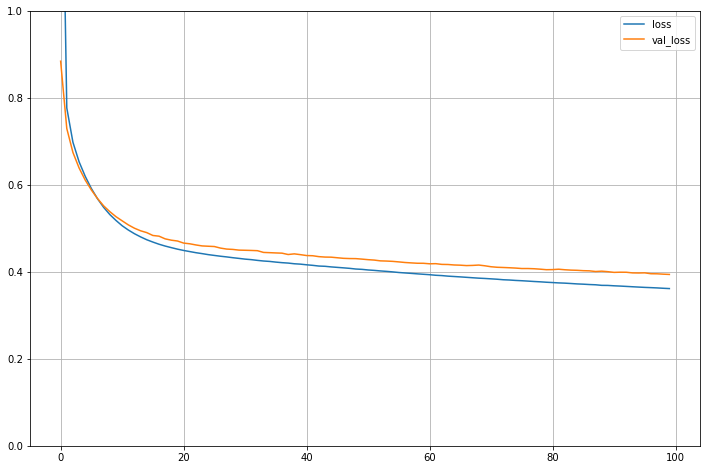

In [115]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set vertical range to [0-1]
plt.show()

In [125]:
# Custom callbacks
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("val/train: {:.2f}\n".format(logs["val_loss"] / logs["loss"]))

val_train_ratio_cb = PrintValTrainRatioCallback()

In [126]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, val_train_ratio_cb])

Epoch 1/100
363/363 [==============================] - 0s 858us/step - loss: 0.3264 - val_loss: 0.3705
val/train: 1.14

Epoch 2/100
363/363 [==============================] - 0s 800us/step - loss: 0.3259 - val_loss: 0.3684
val/train: 1.13

Epoch 3/100
363/363 [==============================] - 0s 838us/step - loss: 0.3255 - val_loss: 0.3683
val/train: 1.13

Epoch 4/100
363/363 [==============================] - 0s 857us/step - loss: 0.3253 - val_loss: 0.3690
val/train: 1.13

Epoch 5/100
363/363 [==============================] - 0s 987us/step - loss: 0.3249 - val_loss: 0.3677
val/train: 1.13

Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3248 - val_loss: 0.3682
val/train: 1.13

Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3240 - val_loss: 0.3668
val/train: 1.13

Epoch 8/100
363/363 [==============================] - 0s 960us/step - loss: 0.3233 - val_loss: 0.3666
val/train: 1.13

Epoch 9/100
363/363 [=======================